<a href="https://colab.research.google.com/github/soodeh-nilforoushan/Recurrent-Neural-Network/blob/main/TF_Linear_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
!pip install tensorflow

In [1]:
import tensorflow as tf

In [4]:
print(tf.__version__)

2.12.0


In [6]:
from sklearn.datasets import load_breast_cancer

In [8]:
data=load_breast_cancer()

In [9]:
data

{'data': array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
         1.189e-01],
        [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
         8.902e-02],
        [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
         8.758e-02],
        ...,
        [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
         7.820e-02],
        [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
         1.240e-01],
        [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
         7.039e-02]]),
 'target': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
        0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
        1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
        1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
        1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0

In [11]:
type(data)

sklearn.utils._bunch.Bunch

it's not a dictionary, it's a bunch object, but the bunch object actually works like a dictionary.

In [12]:
data.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [13]:
data['data']

array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
        1.189e-01],
       [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
        8.902e-02],
       [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
        8.758e-02],
       ...,
       [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
        7.820e-02],
       [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
        1.240e-01],
       [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
        7.039e-02]])

In [14]:
data.data

array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
        1.189e-01],
       [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
        8.902e-02],
       [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
        8.758e-02],
       ...,
       [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
        7.820e-02],
       [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
        1.240e-01],
       [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
        7.039e-02]])

In [15]:
data.data.shape

(569, 30)

data is shaped like number of samples by number of features.
N is the number of samples and D is the number of features.

In [16]:
data.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0,

There's only one square bracket and there are only zeros and ones.

So this means that this is a binary classification problem.

In [17]:
data.target_names

array(['malignant', 'benign'], dtype='<U9')

this will be in corresponding order
So 0 is malignant and 1 is benign

In [18]:
data.target.shape

(569,)

In [19]:
data.feature_names

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='<U23')

In [22]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test =train_test_split(data.data, data.target, test_size=0.33)

In [36]:
N,D=X_train.shape
N,D

(381, 30)

N is the number of samples and D is the number of features

In [35]:
y_train


array([0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1,
       1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0,
       0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0,
       1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0,
       1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1,
       1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1,
       0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0,
       0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0,
       0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0,

In [37]:
from sklearn.preprocessing import StandardScaler
scalar=StandardScaler()
X_train=scalar.fit_transform(X_train)
#fit-Transform just does both fit and transform in one step.
X_test=scalar.transform(X_test)
#why do we call fit transform only on the train set? And then we call transform only on the test set.
#And so the reason it's different is you kind of have to imagine how this is implemented in practice.
#So we're fitting on the train set because that's going to find the parameters, which in this case are
#the mean and variance or the mean and standard deviation of each column.
#And we only want to do that on the train set because this is supposed to emulate how this model would work in the real world.

it goes through every column in the data set and gives it zero mean in variance one.


In [45]:
model= tf.keras.models.Sequential([
tf.keras.layers.Input(shape=(D)),
tf.keras.layers.Dense(1,activation="sigmoid")
])
#We just want the D part because models can take in an arbitrary number of samples.


In [46]:
# #alternative way
# model=tf.keras.models.Sequential()
# model.add(tf.keras.layers.Dense(1,input_shape(D,),activation="sigmoid"))

 create a sequential model with nothing in it, and then you can add layers later on. So add two layers dense.

In [47]:
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [48]:
r=model.fit(X_train,y_train, validation_data=(X_test,y_test),epochs=100)

Epoch 1/100
12/12 [==============================] - 3s 78ms/step - loss: 0.5315 - accuracy: 0.7953 - val_loss: 0.5031 - val_accuracy: 0.7872
Epoch 2/100
12/12 [==============================] - 0s 14ms/step - loss: 0.4889 - accuracy: 0.8189 - val_loss: 0.4638 - val_accuracy: 0.8032
Epoch 3/100
12/12 [==============================] - 0s 21ms/step - loss: 0.4517 - accuracy: 0.8478 - val_loss: 0.4293 - val_accuracy: 0.8191
Epoch 4/100
12/12 [==============================] - 0s 22ms/step - loss: 0.4203 - accuracy: 0.8688 - val_loss: 0.3993 - val_accuracy: 0.8298
Epoch 5/100
12/12 [==============================] - 0s 20ms/step - loss: 0.3926 - accuracy: 0.8845 - val_loss: 0.3733 - val_accuracy: 0.8457
Epoch 6/100
12/12 [==============================] - 0s 12ms/step - loss: 0.3685 - accuracy: 0.8898 - val_loss: 0.3503 - val_accuracy: 0.8564
Epoch 7/100
12/12 [==============================] - 0s 14ms/step - loss: 0.3470 - accuracy: 0.8924 - val_loss: 0.3306 - val_accuracy: 0.8670
Epoch 

In [49]:
print("Train score", model.evaluate(X_train, y_train))
print("Test score", model.evaluate(X_test, y_test))


12/12 [==============================] - 0s 8ms/step - loss: 0.0853 - accuracy: 0.9738
Train score [0.08534567803144455, 0.9737532734870911]
6/6 [==============================] - 0s 7ms/step - loss: 0.0858 - accuracy: 0.9894
Test score [0.08577296882867813, 0.9893617033958435]


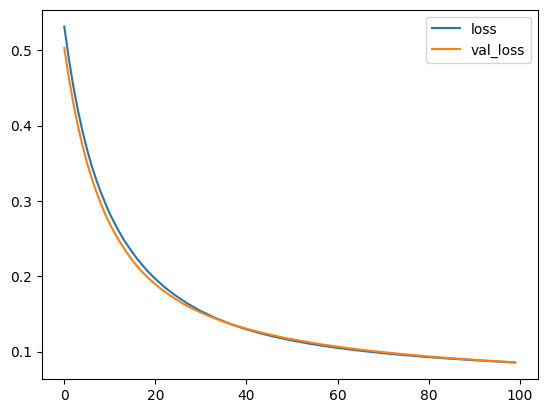

In [51]:
import matplotlib.pyplot as plt
plt.plot(r.history['loss'],label="loss")
plt.plot(r.history['val_loss'],label="val_loss")
plt.legend();

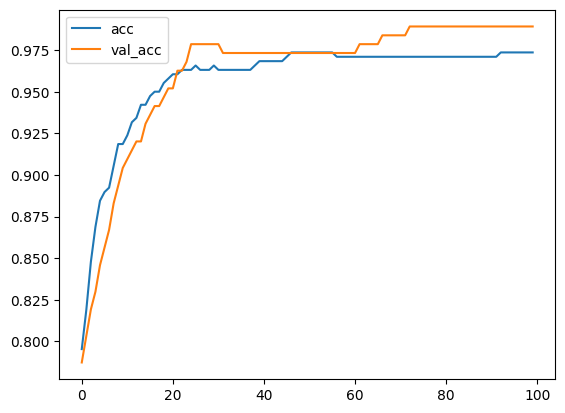

In [52]:
plt.plot(r.history['accuracy'],label="acc")
plt.plot(r.history['val_accuracy'],label="val_acc")
plt.legend();